# Convolutional Neural Network

### Importing the libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.4.0'

## Part 1 - Data Preprocessing

The dataset consists of images of Dogs and cats, we are going to create a CNN , train and implement our model to predict if the image is that of a cat or a dog via UDEMY Machine Learning A-z template

### Preprocessing the Training set

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 1360s 5s/step - loss: 0.6896 - accuracy: 0.5480 - val_loss: 0.6585 - val_accuracy: 0.5980
Epoch 2/25
250/250 [==============================] - 403s 2s/step - loss: 0.6045 - accuracy: 0.6723 - val_loss: 0.5650 - val_accuracy: 0.7120
Epoch 3/25
250/250 [==============================] - 328s 1s/step - loss: 0.5604 - accuracy: 0.7100 - val_loss: 0.5845 - val_accuracy: 0.6860
Epoch 4/25
250/250 [==============================] - 212s 846ms/step - loss: 0.5508 - accuracy: 0.7095 - val_loss: 0.5418 - val_accuracy: 0.7330
Epoch 5/25
250/250 [==============================] - 166s 666ms/step - loss: 0.5298 - accuracy: 0.7347 - val_loss: 0.5357 - val_accuracy: 0.7455
Epoch 6/25
250/250 [==============================] - 163s 653ms/step - loss: 0.4952 - accuracy: 0.7570 - val_loss: 0.5132 - val_accuracy: 0.7455
Epoch 7/25
250/250 [==============================] - 158s 632ms/step - loss: 0.4741 - accuracy: 0.7711 - val_loss: 0.5070 - val_acc

## Part 4 - Making a single prediction

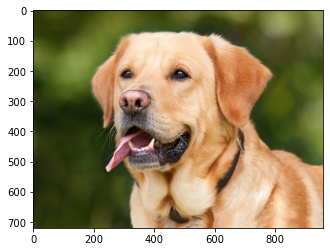

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('dataset/single_prediction/cat_or_dog_1.jpg')
imgplot = plt.imshow(img)
plt.show()

The image above represents a dog. Now, we use our model to predict if it is a cat or a dog

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
      prediction = 'dog'
else:
      prediction = 'cat'

In [ ]:
print(prediction)

dog


The model rightly predicts "Dog"